In [4]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Make sure plots appear inside the notebook
%matplotlib inline


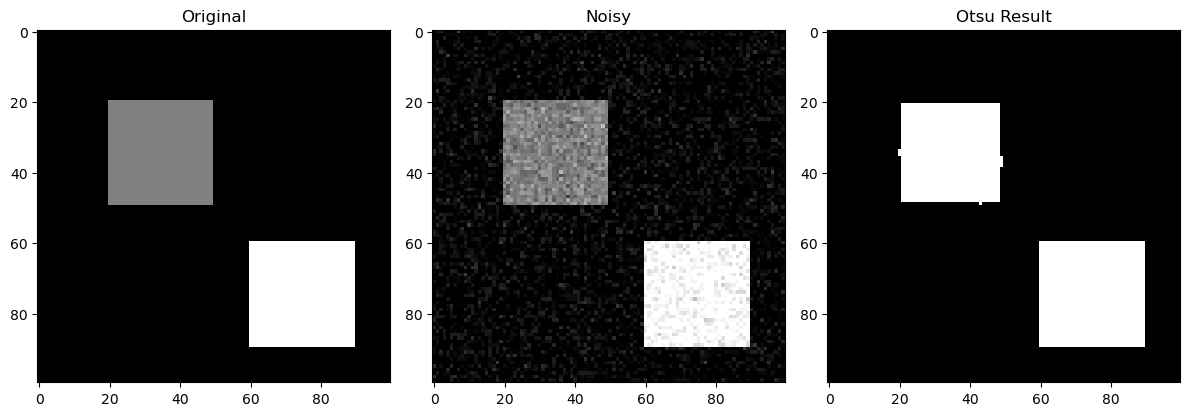

In [6]:
# Create a synthetic image with 3 pixel levels
image = np.zeros((100, 100), dtype=np.uint8)
image[20:50, 20:50] = 128  # Object 1
image[60:90, 60:90] = 255  # Object 2

# Add Gaussian noise
mean = 0
stddev = 20
noise = np.random.normal(mean, stddev, image.shape).astype(np.int16)
noisy_image = np.clip(image.astype(np.int16) + noise, 0, 255).astype(np.uint8)

# Optional: Smooth it
smoothed = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Apply Otsu's threshold
_, otsu_result = cv2.threshold(smoothed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Show results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Noisy")
plt.imshow(noisy_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Otsu Result")
plt.imshow(otsu_result, cmap='gray')

plt.tight_layout()
plt.show()


In [7]:
def region_growing(img, seed_point, threshold=15):
    height, width = img.shape
    segmented = np.zeros_like(img)
    visited = np.zeros_like(img, dtype=bool)

    seed_x, seed_y = seed_point
    seed_value = int(img[seed_x, seed_y])

    stack = [(seed_x, seed_y)]

    while stack:
        x, y = stack.pop()
        if visited[x, y]:
            continue

        visited[x, y] = True
        pixel_value = int(img[x, y])

        if abs(pixel_value - seed_value) <= threshold:
            segmented[x, y] = 255
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                        stack.append((nx, ny))

    return segmented


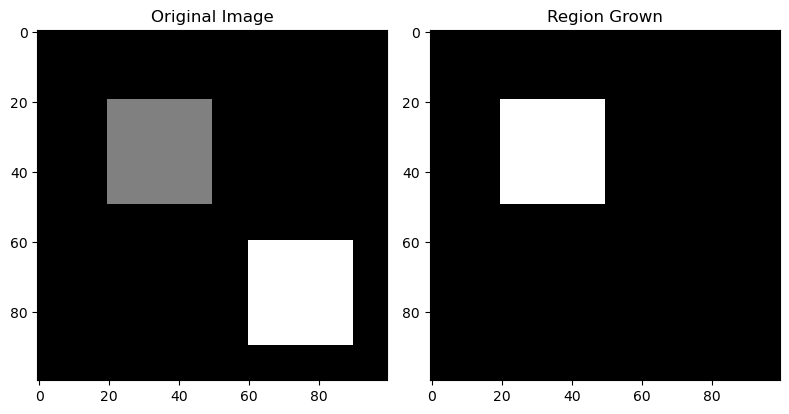

In [8]:
# Use seed point inside object 1
seed = (25, 25)
region_result = region_growing(image, seed, threshold=20)

# Display result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Region Grown")
plt.imshow(region_result, cmap='gray')

plt.tight_layout()
plt.show()
